1/1 [==============================] - 0s 27ms/step


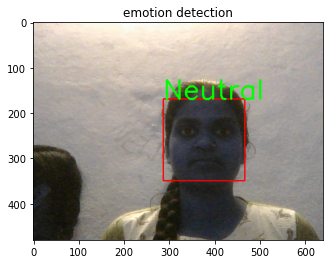

neutral
1/1 [==============================] - 0s 16ms/step


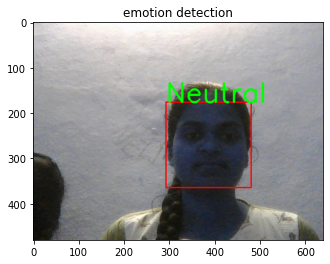

neutral
1/1 [==============================] - 0s 31ms/step


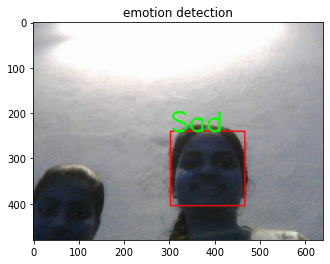

Sad
https://www.youtube.com/watch?v=yvnsgYQyGXo


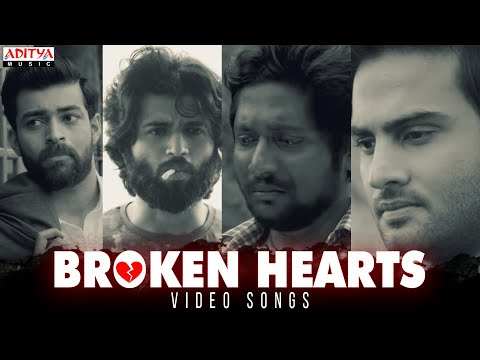

KeyboardInterrupt: 

In [4]:
from keras.models import load_model
import time
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import urllib.request
import re
from IPython.display import clear_output
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

mapping={'Angry':'Anger songs of Indian cinema','Happy':'top joyful songs in telugu','Sad':'sorrow songs in tollywood','Surprise':'celebration superhit songs'}
face_classifier = cv2.CascadeClassifier(r'C:\Users\jhans\Desktop\Project\haarcascade_frontalface_default.xml')
classifier =load_model(r'C:\Users\jhans\Desktop\Project\model.h5')
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']
music_list = {'Angry':0,'Happy':0,'Neutral':0,'Sad':0,'Surprise':0}
def videofuntion():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        labels = []
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)

        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)


            if np.sum([roi_gray])!=0:
                roi = roi_gray.astype('float')/255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi,axis=0)


                preds = classifier.predict(roi)[0]
                label=class_labels[preds.argmax()]
                label_position = (x,y)
                cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
                plt.imshow(frame)
                plt.title('emotion detection')
                plt.show()
                cap.release()
                cv2.destroyAllWindows()
                return label

            else:
                cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            

            
            
            
def videoloop():
    label = videofuntion()
    if(label == "Neutral"):
        print('neutral')
        videoloop()
    print(label)
    
    
    search_keyword=mapping[label]
    
    
    search_keyword=''.join(search_keyword.split())
    
    html = urllib.request.urlopen("https://www.youtube.com/results?search_query=" + search_keyword)
    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
    uni_video_ids=[]
    for x in video_ids:
        if x not in uni_video_ids:
            uni_video_ids.append(x)

    
    index = music_list[label]
    videoId = uni_video_ids[index]
    
    print("https://www.youtube.com/watch?v=" + uni_video_ids[index])
    index += 1
    music_list[label] = index
    
    video = YouTubeVideo(videoId,autoplay=1,start=5)
    display(video)
    time.sleep(15)
    clear_output(wait=True)
    videoloop()
videoloop()